In [46]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import BaseMessage, HumanMessage
from langchain.chat_models import init_chat_model
from langgraph.graph.message import add_messages
from typing import TypedDict, Annotated
import os
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv
load_dotenv()

True

In [12]:
gemini = init_chat_model("google_genai:gemini-2.5-flash-lite", api_key = os.getenv("GOOGLE_API_KEY"))

In [13]:
gemini.invoke("What is the capital of Egypt")

AIMessage(content='The capital of Egypt is **Cairo**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--fbdd6e62-53b4-4da4-aa1e-4274ec801bce-0', usage_metadata={'input_tokens': 7, 'output_tokens': 8, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}})

# State

In [35]:
class ChatState(TypedDict):
    chat_messages: Annotated[list[BaseMessage], add_messages]

# Nodes 

In [36]:
def chat(state: ChatState):
    query = state['chat_messages']
    response = gemini.invoke(query)
    
    return{
        'chat_messages': [response]
    }
    

# Define checkpoint

In [47]:
checkpointer = MemorySaver()

# Graph

In [48]:
graph = StateGraph(ChatState)

graph.add_node('chat_node', chat)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpointer)

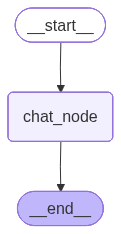

In [38]:
chatbot

In [40]:
initial_state = {
    'chat_messages': [HumanMessage(content="what is the size of earth")]
}
chatbot.invoke(initial_state)

{'chat_messages': [HumanMessage(content='what is the size of earth', additional_kwargs={}, response_metadata={}, id='fb409269-208e-4682-a9a6-c5b9ddd297d9'),
  AIMessage(content='The Earth is a sphere, and its size can be described in a few ways:\n\n**Key Measurements:**\n\n*   **Radius:**\n    *   **Equatorial Radius:** Approximately **6,378.1 kilometers (3,963.2 miles)**. The Earth bulges slightly at the equator due to its rotation.\n    *   **Polar Radius:** Approximately **6,356.8 kilometers (3,949.9 miles)**.\n    *   **Mean Radius:** Often used as a general representation, it\'s approximately **6,371 kilometers (3,959 miles)**.\n\n*   **Diameter:**\n    *   **Equatorial Diameter:** Approximately **12,756.2 kilometers (7,926.4 miles)**.\n    *   **Polar Diameter:** Approximately **12,713.6 kilometers (7,900.0 miles)**.\n    *   **Mean Diameter:** Approximately **12,742 kilometers (7,917.5 miles)**.\n\n*   **Circumference:**\n    *   **Equatorial Circumference:** Approximately **40,

# Define thread id
thread_id for the chat to define the conversation


In [51]:
thread_id = '1'

In [52]:
while True:
    user_input = input("Enter message: ")
    print("User:", user_input)
    if user_input.strip().lower() in ['exit', 'quit', 'bye']:
        print("Exiting chat...")
        break

    input_state = {
        'chat_messages': [HumanMessage(content=user_input)]
    }
    config = {
        'configurable': {
            'thread_id': thread_id
        }
    }
    response = chatbot.invoke(input_state, config = config)
    print(f"AI: {response['chat_messages'][-1].content}")
    
    

User: hi
AI: Hello there! How can I help you today?
User: my name is bips
AI: Hi Bips! It's nice to meet you. What can I do for you today?
User: what is my name?
AI: Your name is Bips. 😊
User: what is 10 + 10
AI: 10 + 10 = 20
User: now add 100 to the result
AI: The result of 10 + 10 is 20.

Adding 100 to that gives you:

20 + 100 = **120**
User: bye
Exiting chat...


In [53]:
chatbot.get_state(config=config)

StateSnapshot(values={'chat_messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='6a88935e-57c6-4b7d-a691-3905e2ac0927'), AIMessage(content='Hello there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--3b111020-41be-4a8c-a8d9-122ed951cb62-0', usage_metadata={'input_tokens': 2, 'output_tokens': 10, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='my name is bips', additional_kwargs={}, response_metadata={}, id='cd963682-9b9f-4de7-90a0-20e4fed8fd37'), AIMessage(content="Hi Bips! It's nice to meet you. What can I do for you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_rat